#Cutout + Baseline

## Purpose
Observe the effects of the data augmentation technique **Cutout**, as introduced by Devries and Taylor (2017), on the model's performance and generalization. A regularization technique which involves masking out some of the original images with a square of predefined dimensions.

In [ ]:
!pip install thop

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
%cd /content/drive/MyDrive/regularization-ml/

/content/drive/MyDrive/regularization-ml


In [4]:
import torch
from PIL import Image
import matplotlib.pyplot as plt

from config.paths import PathConfig # Path config

from src.model import MiniCNN, ConvBlock, FCBlock
from src.train import trainModel
from src.data import CustomDataset, load_cifar_10_data, check_data_loading, Loader, class_to_idx
from src.visualizations import plotFmaps_and_activationHist, plotCurves
from src.utils import unpickle, loadWeights, readJson, genError, saveHistory, evalModel

In [5]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [6]:
paths = PathConfig("regularization-ml", "regularization-data")
PROJECT_DIR = paths.project
DATA_DIR = paths.data
BASE_DIR = paths.root

## Dataset
Stays the same as with baseline. However we append the cutout augmentation technique.

In [7]:
# Copy once from Drive
!cp $DATA_DIR/cifar-10-python.tar.gz /content/

# Extract locally
!mkdir /content/dataset/
!tar -xzf /content/cifar-10-python.tar.gz -C /content/dataset/

In [8]:
LOCAL_DATA = f"{BASE_DIR}/dataset" # path to cifar-10 dataset
train_data, train_labels, val_data, val_labels, test_data, test_labels = load_cifar_10_data(LOCAL_DATA)

## Model Definition + Training Setup
Both stay the same, the default used for baseline

In [9]:
# Defining the layers for the baseline model
base_conv_layers = [
    ConvBlock(3, 64, pool=False),
    ConvBlock(64, 64),
    ConvBlock(64, 128, pool=False),
    ConvBlock(128, 128)
]

base_fc_layers = [
    FCBlock(128, 64),
    torch.nn.Linear(64, 10)
]

baseline_model = MiniCNN(base_conv_layers, base_fc_layers)

## Cutout 8x8
We predefine a cutout class in our loader function, we set the cutout size to an 8x8 block or mask.

In [10]:
train_loader, val_loader, test_loader = Loader(train_data, train_labels, val_data,
                                               val_labels, test_data, test_labels, cutout=True, cutout_size=8)

Starting Data Loading...
⚠️  CUDA not available, using CPU
📁 Loading datasets...
✅ Datasets loaded successfully
Training samples: 40000
Validation samples: 10000
Batch size: 64
🔍 Testing data loading...
✅ Train batch shape: torch.Size([64, 3, 32, 32]), Labels: torch.Size([64])
   Input range: [-1.989, 2.126]
   Label range: [0, 9]
✅ Val batch shape: torch.Size([64, 3, 32, 32]), Labels: torch.Size([64])


In [ ]:
"""
history_cutout8 = {"train_loss": [], "val_loss": [], "train_acc": [], "val_acc": []}
model_type = "cutout8"
path = f"{DATA_DIR}/weights"
cutout8_model = trainModel(baseline_model, history_cutout8, train_loader, val_loader, model_type, path)
"""

In [ ]:
"""
history_path = f"{DATA_DIR}/logs/cutout8.json"
saveHistory(history_cutout8, history_path) # Saves the training metadata to a json file
"""

The model trained for max epochs, early stopping was not triggered.

In [11]:
visuals8 = f"{DATA_DIR}/visualizations/cutout8"
weights_path = f"{DATA_DIR}/weights/cutout8.pth"
cutout8 = loadWeights(baseline_model, weights_path)

In [13]:
cutout8_json = f"{DATA_DIR}/logs/cutout8.json"
cutout8_data = readJson(cutout8_json)

Save folder not found, creating..


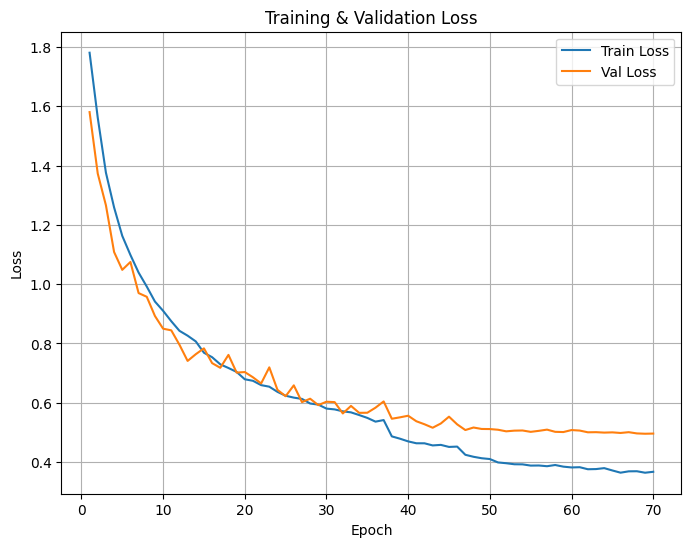

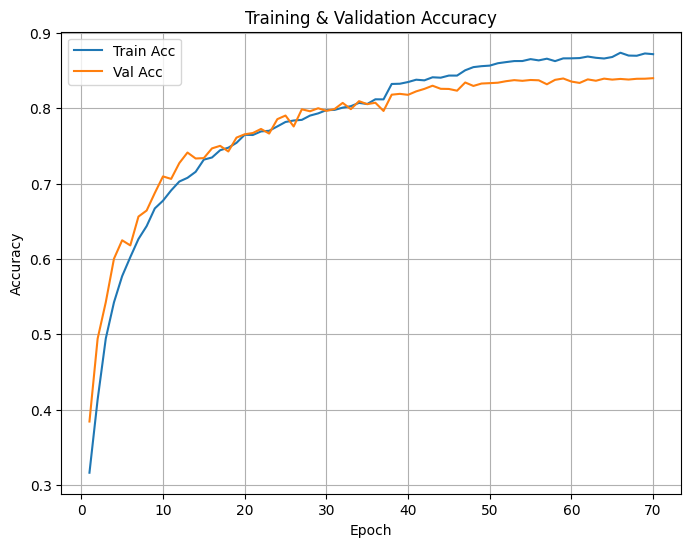

In [15]:
train_losses_cut8 = cutout8_data["train_loss"]
val_losses_cut8 = cutout8_data["val_loss"]
train_accs_cut8 = cutout8_data["train_acc"]
val_accs_cut8 = cutout8_data["val_acc"]
plotCurves(train_losses_cut8, val_losses_cut8, train_accs_cut8, val_accs_cut8, visuals8)

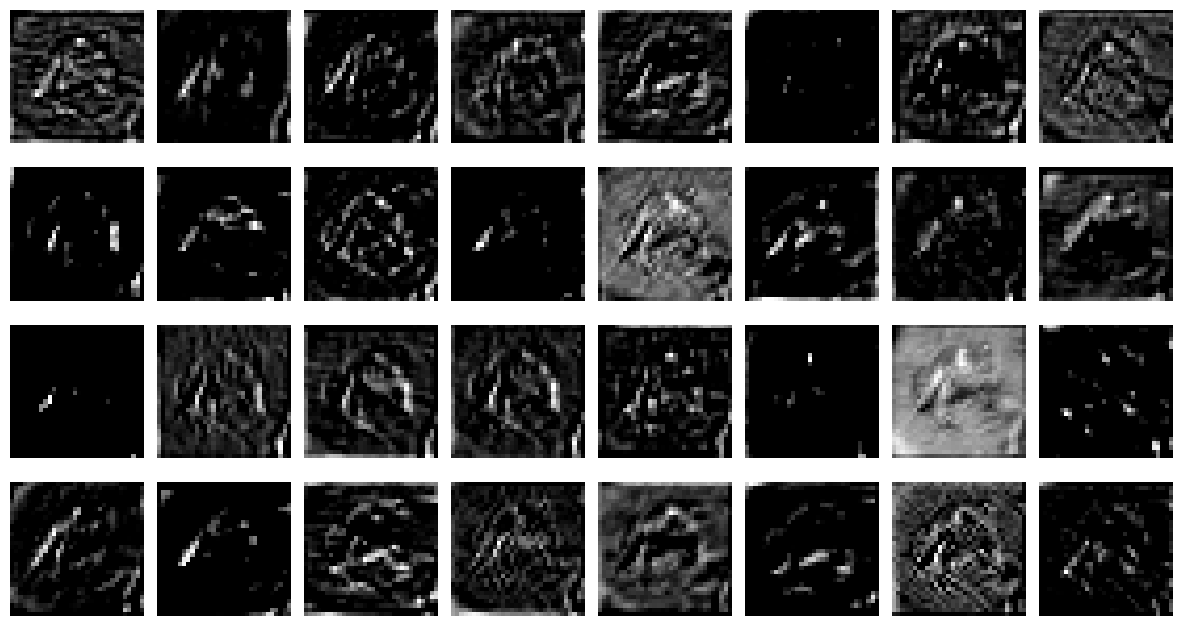

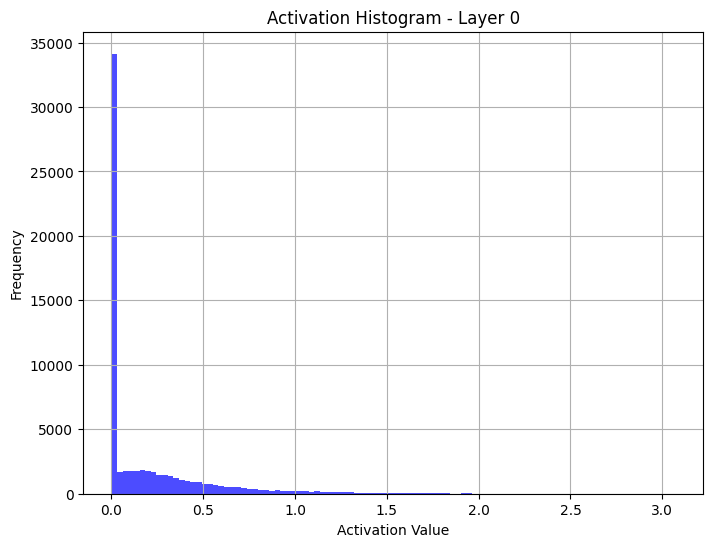

In [17]:
plotFmaps_and_activationHist(cutout8, visuals8, val_loader)

Accuracy: 0.8408
              precision    recall  f1-score   support

           0     0.8530    0.8590    0.8560      1000
           1     0.9136    0.9300    0.9217      1000
           2     0.7613    0.7780    0.7695      1000
           3     0.7486    0.6880    0.7170      1000
           4     0.7804    0.8350    0.8068      1000
           5     0.7733    0.7710    0.7722      1000
           6     0.8653    0.8740    0.8697      1000
           7     0.8906    0.8470    0.8683      1000
           8     0.9173    0.9090    0.9131      1000
           9     0.9034    0.9170    0.9102      1000

    accuracy                         0.8408     10000
   macro avg     0.8407    0.8408    0.8404     10000
weighted avg     0.8407    0.8408    0.8404     10000

[INFO] Register count_convNd() for <class 'torch.nn.modules.conv.Conv2d'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.activation.ReLU'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.container.Sequenti

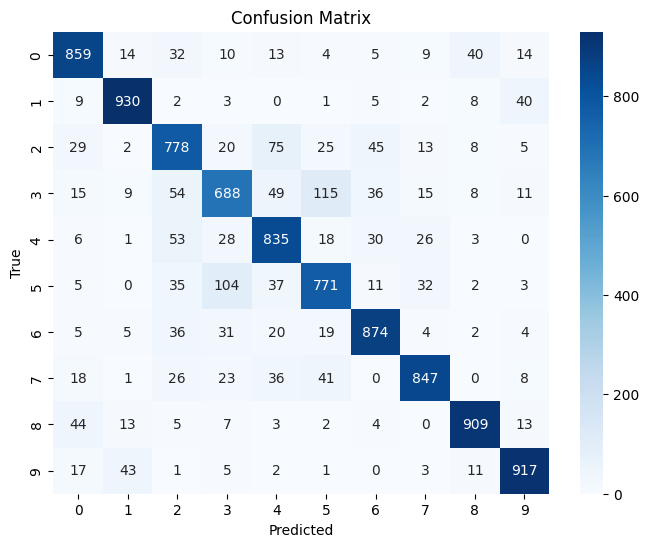

In [16]:
evalModel(cutout8, visuals8, test_loader)

## Cutout 16x16

In [ ]:
train_loader, val_loader, test_loader = Loader(train_data, train_labels, val_data, val_labels, test_data, test_labels, cutout=True, cutout_size=16)

In [ ]:
"""
history_cutout16 = {"train_loss": [], "val_loss": [], "train_acc": [], "val_acc": []}
model_type = "cutout16"
path = f"{DATA_DIR}/weights"
cutout16_model = trainModel(baseline_model, history_cutout16, train_loader, val_loader, model_type, path)
"""

In [ ]:
"""
history_path = f"{DATA_DIR}/logs/cutout16.json"
saveHistory(history_cutout16, history_path) # Saves the training metadata to a json file
"""

File Saved!


In [18]:
visuals16 = f"{DATA_DIR}/visualizations/cutout16"
weights_path = f"{DATA_DIR}/weights/cutout16.pth"
cutout16 = loadWeights(baseline_model, weights_path)

In [20]:
cutout16_json = f"{DATA_DIR}/logs/cutout16.json"
cutout16_data = readJson(cutout16_json)

train_loss: [1.9902087741851806, 1.7060966749191284, 1.5329330064773559, 1.4066434715270997, 1.3244320695877074, 1.2450627387046813, 1.1894897303581238, 1.133008849143982, 1.0913719215393067, 1.0575372169494628, 1.0202011219978333, 0.9958666294097901, 0.9678302516937256, 0.9455775596618652, 0.9229086422920227, 0.9104217260360717, 0.883584933757782, 0.8631800685405732, 0.8553921239852905, 0.8307071635246277, 0.8273971779823304, 0.8074121270179748, 0.804161999130249, 0.789281032705307, 0.7770691490650177, 0.7626828920841217, 0.7596562123298645, 0.7449728518009185, 0.737007295513153, 0.7294773736000061, 0.7169464889526367, 0.716860771894455, 0.7158374096393585, 0.70068076338768, 0.6967822304725647, 0.6859802570819855, 0.6886280962467194, 0.6330958758354187, 0.6311093369960785, 0.6259656992912292, 0.6198574980735779, 0.6080884739875794, 0.5883793565750122, 0.5837417906284332, 0.5837762396812439, 0.5756065784931182, 0.5778325382709503, 0.5755345600128173, 0.5702697337150574, 0.5705464365959

Save folder not found, creating..


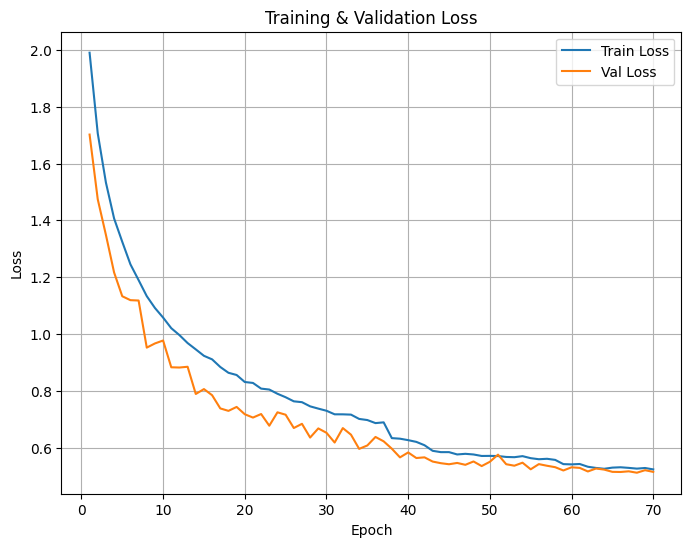

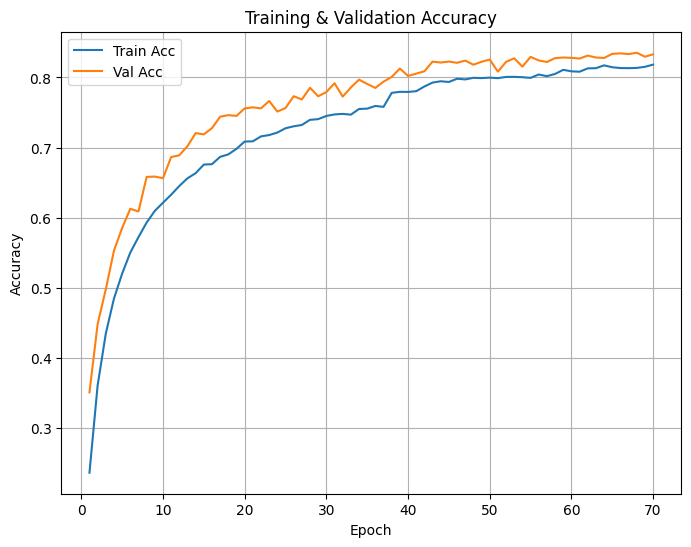

In [21]:
train_losses_cut16 = cutout16_data["train_loss"]
val_losses_cut16 = cutout16_data["val_loss"]
train_accs_cut16 = cutout16_data["train_acc"]
val_accs_cut16 = cutout16_data["val_acc"]
plotCurves(train_losses_cut16, val_losses_cut16, train_accs_cut16, val_accs_cut16, visuals16)

Accuracy: 0.8322
              precision    recall  f1-score   support

           0     0.8222    0.8740    0.8473      1000
           1     0.9359    0.9050    0.9202      1000
           2     0.7406    0.7880    0.7636      1000
           3     0.6788    0.7290    0.7030      1000
           4     0.7978    0.8010    0.7994      1000
           5     0.7928    0.7270    0.7585      1000
           6     0.8728    0.8370    0.8545      1000
           7     0.8957    0.8420    0.8680      1000
           8     0.9116    0.9070    0.9093      1000
           9     0.8968    0.9120    0.9043      1000

    accuracy                         0.8322     10000
   macro avg     0.8345    0.8322    0.8328     10000
weighted avg     0.8345    0.8322    0.8328     10000

[INFO] Register count_convNd() for <class 'torch.nn.modules.conv.Conv2d'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.activation.ReLU'>.
[INFO] Register zero_ops() for <class 'torch.nn.modules.container.Sequenti

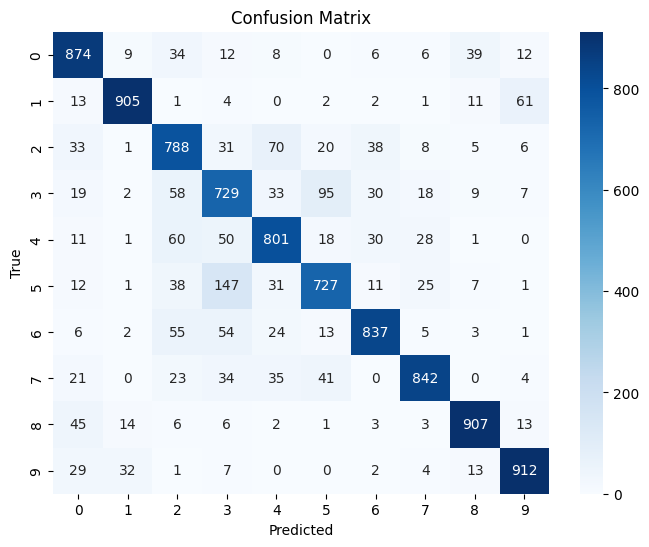

In [22]:
evalModel(cutout16, visuals16, test_loader)